In [1]:
#from PCA_part1 import pca_svd_from_file
import matplotlib.pyplot as plt
import scipy as sc
import matplotlib.image as mpimg
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from PIL import Image
#import cv2

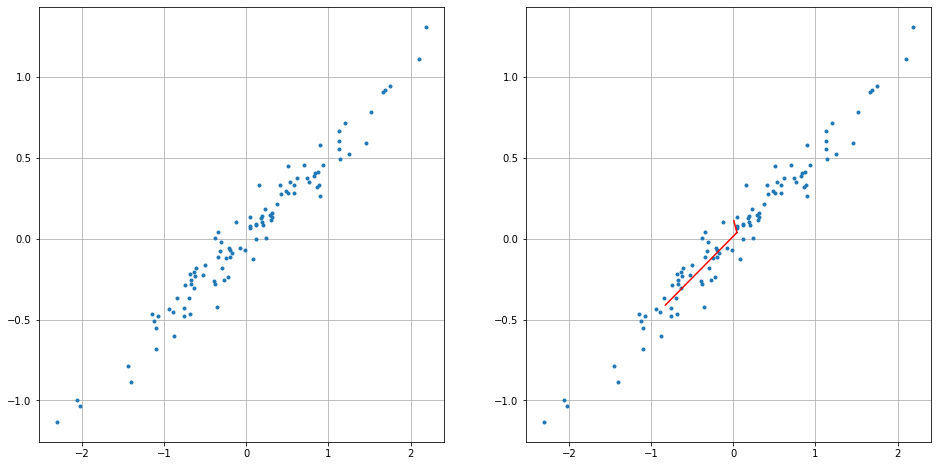

In [2]:
#val = pca_svd_from_file()
pca_text_file = pd.read_csv('pca_dataset.txt', delimiter=' ')

#print(type(pca_text_file))
#pca_text_file.keys()
#val = preprocessing.scale(pca_text_file.T)

#scalar = preprocessing.StandardScaler()
#scalar.fit(pca_text_file)
#scalar_values = scalar.transform(pca_text_file)
#print(scalar_values)

plt.rcParams['figure.figsize'] = [16,8]

nPoints = 99
X = pca_text_file.to_numpy()

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:,0],X[:,1],'.')
ax1.grid()

Xavg = np.mean(X,axis=0)
B = X - np.tile(Xavg,(nPoints,1))

U, S, VT = np.linalg.svd((B.T)/np.sqrt(100))

ax2 = fig.add_subplot(122)
ax2.plot(X[:,0],X[:,1],'.')
ax2.grid()
ax2.plot(np.array([Xavg[0],Xavg[0]+U[0,0]*S[0]]),np.array([Xavg[1],Xavg[1]+U[1,0]*S[0]]),'-',color='red')
ax2.plot(np.array([Xavg[0],Xavg[0]+U[0,1]*S[1]]),np.array([Xavg[1],Xavg[1]+U[1,1]*S[1]]),'-',color='red')

comp1_p1,comp1_p2 = np.array([Xavg[0],Xavg[0]+U[0,0]*S[0]]),np.array([Xavg[1],Xavg[1]+U[1,0]*S[0]])
comp2_p1,comp2_p2 = np.array([Xavg[0],Xavg[0]+U[0,1]*S[1]]),np.array([Xavg[1],Xavg[1]+U[1,1]*S[1]])
      
plt.show()



# Energy contained in each coponent

In [3]:
#Energy in the first component
S_comp1 = (S[0]*S[0])/sum(S*S)
print(S_comp1)
#Energy in the second component
S_comp2 = (S[1]*S[1])/sum(S*S)
print(S_comp2)


0.9929871280253522
0.007012871974647905


In [4]:
# Checking if the lines are orthogonal to each other
slope_product = np.dot(comp1_p2 - comp1_p2, comp2_p2 - comp2_p2)
print(slope_product)

0.0


## PCA with Image data

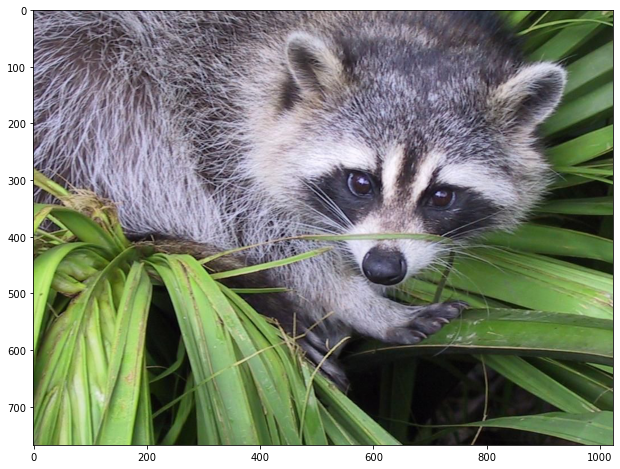

In [5]:
#Original Image data that is being used
original_image_data =  sc.misc.face()
#print(original_image_data)
#print(original_image_data.shape)
plt.imshow(original_image_data)

[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]


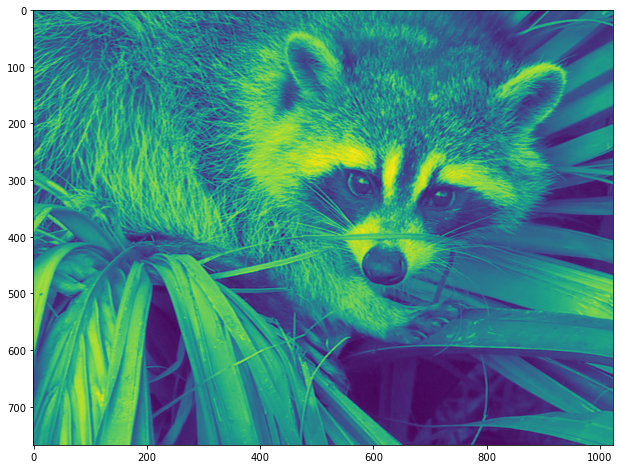

In [47]:
#Gray scale image of the original that is being used
gray_image_data = sc.misc.face(gray=True)
print(gray_image_data)
image_size = gray_image_data.shape
plt.imshow(gray_image_data)

In [48]:
X_img_avg = np.mean(gray_image_data,axis=0)
B_img = gray_image_data - np.tile(X_img_avg,(image_size[0],1))

U_img, S_img, VT_img = np.linalg.svd((B_img.T)/np.sqrt(image_size[1]))


# Image with all principal components

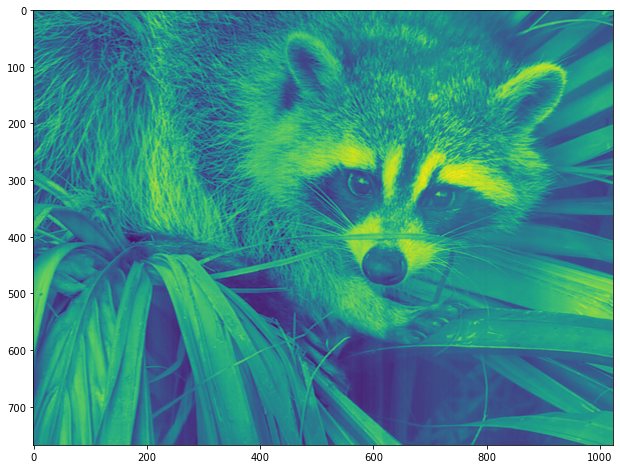

In [37]:
S_img_eye = S_img*np.eye(U_img.shape[0],VT_img.shape[0])
constr_data = np.matmul(np.matmul(U_img,S_img_eye),VT_img)

plt.imshow(constr_data.T)

# Image with 120 principal component

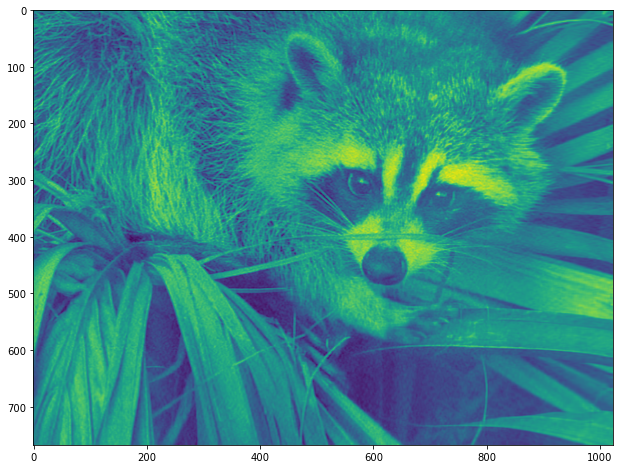

In [41]:
S_img_120 = np.zeros(S_img.shape)
S_img_120[0:120] = S_img[0:120]

S_img_eye_120 = S_img_120*np.eye(U_img.shape[0],VT_img.shape[0])
constr_data_120 = np.matmul(np.matmul(U_img,S_img_eye_120),VT_img)

plt.imshow(constr_data_120.T)

# Image with 50 principal component

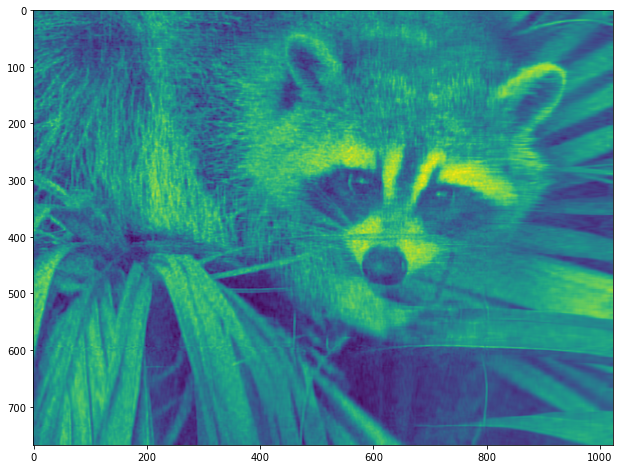

In [44]:
S_img_50 = np.zeros(S_img.shape)
S_img_50[0:50] = S_img[0:50]

S_img_eye_50 = S_img_50*np.eye(U_img.shape[0],VT_img.shape[0])
constr_data_50 = np.matmul(np.matmul(U_img,S_img_eye_50),VT_img)

plt.imshow(constr_data_50.T)

# Image with 10 principal component

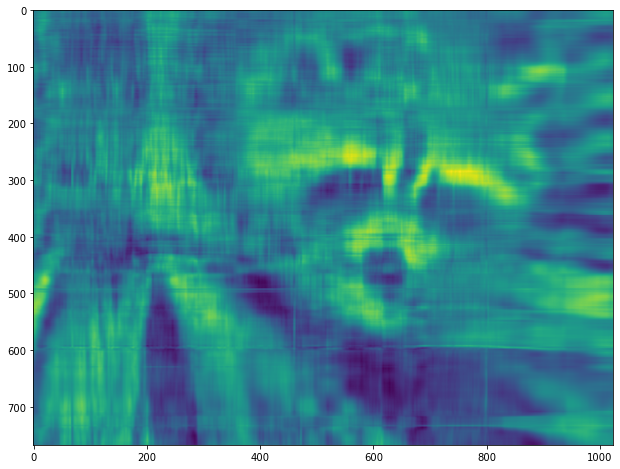

In [46]:
S_img_10 = np.zeros(S_img.shape)
S_img_10[0:10] = S_img[0:10]

S_img_eye_10 = S_img_10*np.eye(U_img.shape[0],VT_img.shape[0])
constr_data_10 = np.matmul(np.matmul(U_img,S_img_eye_10),VT_img)

plt.imshow(constr_data_10.T)

In [40]:
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])
a = np.array([1,2,3,4,5])
a_cpy = np.zeros(b.shape)
a_cpy[0:a.shape[0]] = a
print(a_cpy[0:4])

[1. 2. 3. 4.]


# Pedestrian Data

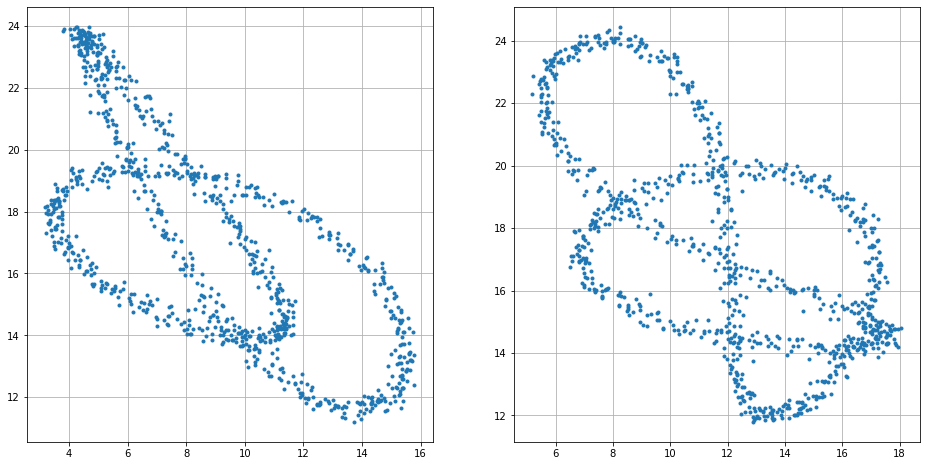

In [54]:
# Reading the data from the data_DMAP_PCA_vadere.txt file
ped_pca_vadere_text = pd.read_csv('data_DMAP_PCA_vadere.txt', delimiter=' ')
ped_data_array = ped_pca_vadere_text.to_numpy()

#print(ped_data_array)
#print(ped_data_array.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(ped_data_array[:,0],ped_data_array[:,1],'.')
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(ped_data_array[:,2],ped_data_array[:,3],'.')
ax2.grid()

(999, 30)
(999, 999)
(30,)
(30, 30)


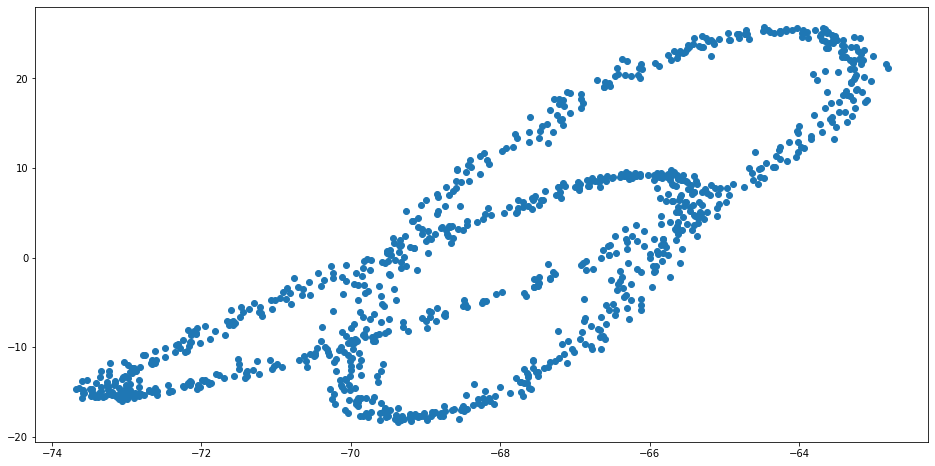

In [63]:

#Xavg = np.mean(X,axis=0)
#B = X - np.tile(Xavg,(nPoints,1))

U_ped, S_ped, VT_ped = np.linalg.svd((ped_data_array)/np.sqrt(1000))

print(ped_data_array.shape)
print(U_ped.shape)
print(S_ped.shape)
print(VT_ped.shape)

pca1_data = np.zeros((ped_data_array.shape[0],1))
pca2_data = np.zeros((ped_data_array.shape[0],1))

for j in range(ped_data_array.shape[0]):
    pca1_data[j] = np.dot(ped_data_array[j,:],VT_ped[0])
    pca2_data[j] = np.dot(ped_data_array[j,:],VT_ped[1])

plt.scatter(pca1_data,pca2_data)

In [ ]:
pca_text_file = pd.read_csv('pca_dataset.txt', delimiter=' ')
#pca_text_file
plt.figure()
plt.scatter(pca_text_file.to_numpy()[:,0],pca_text_file.to_numpy()[:,1])
